Para crear el ambiente: 
```
conda create -n torch-tuto
conda activate torch-tuto
```  
Para instalar PyTorch:
```
conda install pytorch torchvision torchaudio cpuonly -c pytorch
```
Otras librerías para correr este notebook:
```
conda install jupyter ipykernel matplotlib tqdm
```

### Tensores

In [1]:
import torch

In [2]:
torch.zeros((5,2))

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])

In [3]:
torch.ones(5)

tensor([1., 1., 1., 1., 1.])

In [4]:
torch.linspace(0, 10, 5)

tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])

In [5]:
lista = [1, 2, 3, 4, 5]
torch.Tensor(lista)

tensor([1., 2., 3., 4., 5.])

In [6]:
import numpy as np
numpy_array = np.random.randn(10)
torch_array = torch.from_numpy(numpy_array)
torch_array

tensor([-0.3817, -0.6920,  0.1461, -0.6874, -1.0592, -1.7710, -0.7885,  0.1025,
        -0.2129,  0.6133], dtype=torch.float64)

In [7]:
torch_array.numpy()

array([-0.38174445, -0.6919593 ,  0.14606596, -0.68741927, -1.05916597,
       -1.77104651, -0.7884571 ,  0.10250225, -0.21289948,  0.61328992])

### Atributos

In [8]:
a = torch.randn(10, 20, 30)
a.ndim, a.shape, a.dtype

(3, torch.Size([10, 20, 30]), torch.float32)

In [9]:
a = torch.linspace(0, 9, 10)
a

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [10]:
b = a.reshape(2, 5)
b

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])

In [11]:
b.T

tensor([[0., 5.],
        [1., 6.],
        [2., 7.],
        [3., 8.],
        [4., 9.]])

In [12]:
b.flatten()

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [13]:
c = b.unsqueeze(1)
c, c.shape

(tensor([[[0., 1., 2., 3., 4.]],
 
         [[5., 6., 7., 8., 9.]]]),
 torch.Size([2, 1, 5]))

In [14]:
c.squeeze()

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])

### Calculos

In [15]:
data = torch.linspace(0, 5, steps=6)
data

tensor([0., 1., 2., 3., 4., 5.])

In [16]:
data + 5

tensor([ 5.,  6.,  7.,  8.,  9., 10.])

In [17]:
data.pow(2)

tensor([ 0.,  1.,  4.,  9., 16., 25.])

In [18]:
mask = data > 3
data[mask]

tensor([4., 5.])

### Construcción de redes neuronakles

```
y = w*x + b
```

In [19]:
import torch.nn as nn

capa = nn.Linear(3, 2)
capa.weight, capa.bias

(Parameter containing:
 tensor([[0.1864, 0.4206, 0.2722],
         [0.0099, 0.5627, 0.5694]], requires_grad=True),
 Parameter containing:
 tensor([-0.2912, -0.2110], requires_grad=True))

<img src="data/ej1.jpg"  width="1000" height="600">


In [20]:
0.1771 * 1 + 0.4426 * 1 - 0.4689 * 1 + 0.1094

0.26020000000000004

In [21]:
0.1046 * 1 + 0.2171 * 1 - 0.3273 * 1 + 0.0646

0.05900000000000001

In [22]:
capa = nn.Linear(3, 3)

In [23]:
salida = capa.forward(torch.Tensor([1, 1, 1]))
salida

tensor([ 0.1177,  0.5345, -0.0447], grad_fn=<ViewBackward0>)

### Funciones de activacion

$$
\text{ReLU}(x) = \max(0, x)
$$
$$
\text{Sigmoide}(x) = \frac{1}{1 + e^{-x}}
$$

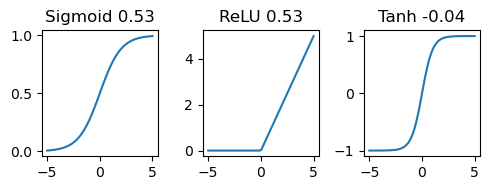

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt
import torch.nn as nn

data = torch.linspace(-5, 5, steps=100)
activations = [nn.Sigmoid(), nn.ReLU(),nn.Tanh()]
nombres = ['Sigmoid', 'ReLU','Tanh']
fig, ax = plt.subplots(1, len(activations), figsize=(5, 2), tight_layout=True)
for activation, ax_,nombre,out in zip(activations, ax, nombres,salida):
    ax_.set_title(nombre + " "+ str(format(activation(out).item(), '.2f')))
    ax_.plot(data, activation(data))

### Definicion de modelos

In [25]:
class MiClase(nn.Module):
    def __init__(self,input_dim,hidden_dim,output_dim):
        super(MiClase, self).__init__()
        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)
        self.activation = nn.Sigmoid()
    def forward(self, x):
        x = self.hidden(x)
        x = self.activation(x)
        x = self.output(x)
        return x

### Funciones de costo y optimizadores

Para entrenar una red neuronal debemos definir

- Una función de costo: Aquello que vamos a minimizar

- Un algoritmo de optimización: De que forma vamos a minimizar

Con las redes neuronales se suelen solucionar 2 tipos de problemas, problemas de regresión y problemas de clasificación.
    
Para problemas de regresión se suele utilizar la función de costo ```MSE (Mean Squared Error)``` y para problemas de clasificación se suele utilizar la función de costo ```CrossEntropyLoss```.

In [26]:
criterion = nn.MSELoss(reduction='mean')
output = torch.randn(5)
target = torch.randn(5)
display(output,target)

tensor([ 0.9274, -0.9024,  1.5618, -0.9167, -1.1856])

tensor([ 0.0641, -0.3651, -0.3274,  0.8265,  0.3642])

In [27]:
loss = criterion(output, target)
loss

tensor(2.0087)

In [28]:
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
output = torch.randn(5,5)
target = torch.empty(5, dtype=torch.long).random_(5)
display(output,target)

tensor([[-1.0477,  2.2721, -0.4706, -0.1263,  0.5051],
        [ 2.2203, -1.1293,  2.3201,  0.7857, -0.1120],
        [ 0.4937, -1.0940,  1.7679,  0.2613, -0.6720],
        [ 0.3746, -0.8031,  0.8944,  1.2732,  0.8788],
        [ 0.7420,  1.3700, -1.1042, -0.7478,  0.2025]])

tensor([3, 2, 1, 1, 4])

In [29]:
loss = criterion(output, target)
loss

tensor(2.3794)

Para el algoritmo de optimización se suele utilizar el algoritmo ```SGD (Stochastic Gradient Descent)``` o ```Adam```.

In [30]:
X = torch.tensor([0,10,20,30,40,50,60,70,80,90,100], dtype=torch.float32).unsqueeze(1)
y = torch.tensor([32.0,50.0,68.0,86.0,104.0,122.0,140.0,158.0,176.0,194.0,212.0]).unsqueeze(1)
X

tensor([[  0.],
        [ 10.],
        [ 20.],
        [ 30.],
        [ 40.],
        [ 50.],
        [ 60.],
        [ 70.],
        [ 80.],
        [ 90.],
        [100.]])

In [31]:
y

tensor([[ 32.],
        [ 50.],
        [ 68.],
        [ 86.],
        [104.],
        [122.],
        [140.],
        [158.],
        [176.],
        [194.],
        [212.]])

In [32]:
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

hat_y = model(X)
hat_y

tensor([[ -0.9388],
        [ -6.7645],
        [-12.5901],
        [-18.4157],
        [-24.2414],
        [-30.0670],
        [-35.8926],
        [-41.7183],
        [-47.5439],
        [-53.3696],
        [-59.1952]], grad_fn=<AddmmBackward0>)

In [33]:
loss = criterion(hat_y, y)
loss

tensor(28800.9824, grad_fn=<MseLossBackward0>)

In [34]:
model.weight, model.bias

(Parameter containing:
 tensor([[-0.5826]], requires_grad=True),
 Parameter containing:
 tensor([-0.9388], requires_grad=True))

In [35]:
loss.backward() #Calcula los gradientes
optimizer.step() #Actualiza los pesos

In [36]:
model.weight, model.bias

(Parameter containing:
 tensor([[-0.5816]], requires_grad=True),
 Parameter containing:
 tensor([-0.9378], requires_grad=True))

In [37]:
model(X)

tensor([[ -0.9378],
        [ -6.7535],
        [-12.5691],
        [-18.3847],
        [-24.2004],
        [-30.0160],
        [-35.8316],
        [-41.6473],
        [-47.4629],
        [-53.2786],
        [-59.0942]], grad_fn=<AddmmBackward0>)

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim

X = torch.tensor([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], dtype=torch.float32).unsqueeze(1)
Y = (X * 1.8) + 32

model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)


for nepoch in range(25000):
    hatY = model(X)
    optimizer.zero_grad()
    loss = criterion(hatY, Y)
    loss.backward()
    optimizer.step()
    if nepoch % 1000 == 0:
        print(f'Epoch {nepoch} Loss {loss.item()}')

with torch.no_grad():
    predicted = model(X)
    for i in range(len(X)):
        print(f'Entrada: {X[i].item():.1f}°C, Predicción: {predicted[i].item():.1f}°F, Real: {Y[i].item():.1f}°F')


Epoch 0 Loss 5979.82861328125
Epoch 1000 Loss 227.8923797607422
Epoch 2000 Loss 144.40126037597656
Epoch 3000 Loss 74.6468734741211
Epoch 4000 Loss 29.814964294433594
Epoch 5000 Loss 7.986509799957275
Epoch 6000 Loss 1.0735673904418945
Epoch 7000 Loss 0.042255550622940063
Epoch 8000 Loss 0.00019666212028823793
Epoch 9000 Loss 2.781565555665111e-08
Epoch 10000 Loss 3.124693170875048e-09
Epoch 11000 Loss 8.744377999470032e-10
Epoch 12000 Loss 3.6545150239319923e-10
Epoch 13000 Loss 1.0715501402858152e-10
Epoch 14000 Loss 2.8756926440109964e-06
Epoch 15000 Loss 9.874624993244652e-07
Epoch 16000 Loss 0.0
Epoch 17000 Loss 0.0
Epoch 18000 Loss 0.0
Epoch 19000 Loss 0.0
Epoch 20000 Loss 0.0
Epoch 21000 Loss 0.0
Epoch 22000 Loss 0.0
Epoch 23000 Loss 0.0
Epoch 24000 Loss 0.0
Entrada: 0.0°C, Predicción: 32.0°F, Real: 32.0°F
Entrada: 10.0°C, Predicción: 50.0°F, Real: 50.0°F
Entrada: 20.0°C, Predicción: 68.0°F, Real: 68.0°F
Entrada: 30.0°C, Predicción: 86.0°F, Real: 86.0°F
Entrada: 40.0°C, Predicci

In [39]:
model.weight, model.bias

(Parameter containing:
 tensor([[1.8000]], requires_grad=True),
 Parameter containing:
 tensor([32.], requires_grad=True))

### Entrenamiento por minibatches

In [41]:
import torch.utils.data as data
X = np.random.uniform(-273,1000,10000)
y = X*1.8 + 32
class MyDataset(data.Dataset):
    def __init__(self, data: np.ndarray, salida: np.ndarray):
        self.celsius = torch.from_numpy(data.astype('float32')).unsqueeze(1)
        self.fahrenheit = torch.from_numpy(salida.astype('float32')).unsqueeze(1)
        
    def __getitem__(self, idx: int):
        return (self.celsius[idx], self.fahrenheit[idx])
    
    def __len__(self):
        return len(self.fahrenheit)
    
    
dataset = MyDataset(X, y)

dataset[0], len(dataset)

((tensor([834.9146]), tensor([1534.8463])), 10000)

In [42]:
train_set, valid_set, test_set = data.random_split(dataset, [6000, 2000, 2000], 
                                                   generator=torch.Generator().manual_seed(1234))

In [43]:
train_loader = data.DataLoader(train_set, shuffle=True, batch_size=32)
valid_loader = data.DataLoader(valid_set, shuffle=False, batch_size=128)
test_loader = data.DataLoader(test_set, shuffle=False, batch_size=128)

In [51]:
from tqdm import tqdm

num_epochs = 100
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)

running_loss = np.zeros((num_epochs,2))
for i in tqdm(range(num_epochs)):
    for minibatch in train_loader:
        optimizer.zero_grad()
        x_batch,y_batch = minibatch
        hat_y = model(x_batch.unsqueeze(1))
        loss = criterion(hat_y, y_batch)
        loss.backward()
        optimizer.step()
    for minibatch in valid_loader:
        x_batch,y_batch = minibatch
        hat_y = model(x_batch.unsqueeze(1))
        loss = criterion(hat_y, y_batch)
    if i%10 == 0:
        print(f'Epoch {i} Loss {loss.item()}')


  2%|▏         | 2/100 [00:00<00:18,  5.34it/s]

Epoch 0 Loss 730713.75


 12%|█▏        | 12/100 [00:02<00:15,  5.66it/s]

Epoch 10 Loss 718806.75


 22%|██▏       | 22/100 [00:04<00:13,  5.65it/s]

Epoch 20 Loss 707178.1875


In [46]:
model.weight, model.bias

(Parameter containing:
 tensor([[0.7449]], requires_grad=True),
 Parameter containing:
 tensor([181.2383], requires_grad=True))